# Importing libraries and initialising data


In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:

print(tf.__version__)

2.10.0


## Getting train and testing data

In [12]:
(x_train, y_train), (x_rem, y_rem) = tf.keras.datasets.fashion_mnist.load_data()

In [13]:
from sklearn.model_selection import train_test_split

x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)
print(x_train.shape), print(y_train.shape)
print(x_valid.shape), print(y_valid.shape)
print(x_test.shape), print(y_test.shape)

(60000, 28, 28)
(60000,)
(5000, 28, 28)
(5000,)
(5000, 28, 28)
(5000,)


(None, None)

# Problem Statement

## Implement an image classifier using a deep learning network. 

### X_train and x_test are 28x28 images of fashion items. The y_train and y_test are the labels for the images. The labels are integers from 0 to 9. The labels are as follows:


### List of labels
<ol>
<li>T-shirt/top</li>
<li>Trouser</li>
<li>Pullover</li>
<li>Dress</li>
<li>Coat</li>
<li>Sandal</li>
<li>Shirt</li>
<li>Sneaker</li>
<li>Bag</li>
<li>Ankle boot</li>
</ol>

Image dimmensions are 28x28.

The train set and test set are given in two separate datasets.

C:\Users\Xavier\AppData\Local\Temp\ipykernel_40608\1896127723.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(330 + 1 + i)


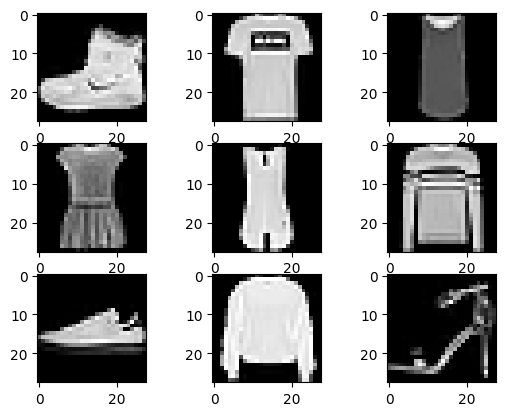

In [14]:
plt.axis('off')
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    
# show the figure

plt.show()

# EDA

In [15]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(pd.DataFrame(y_train, columns=["label"]))

Ankle Boot          :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Pullover            :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Trouser             :   6000 or 10.0%
Shirt               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Bag                 :   6000 or 10.0%


# Info for building models

The Sequential model is a linear stack of layers. It can be first initialized and then we add layers using add method or we can add all layers at init stage. The layers added are as follows:

Conv2D is a 2D Convolutional layer (i.e. spatial convolution over images). The parameters used are:

filters - the number of filters (Kernels) used with this layer; here filters = 32;
kernel_size - the dimmension of the Kernel: (3 x 3);
activation - is the activation function used, in this case relu;
kernel_initializer - the function used for initializing the kernel;
input_shape - is the shape of the image presented to the CNN: in our case is 28 x 28 The input and output of the Conv2D is a 4D tensor.
MaxPooling2D is a Max pooling operation for spatial data. Parameters used here are:

pool_size, in this case (2,2), representing the factors by which to downscale in both directions;

Conv2D with the following parameters:

filters: 64;
kernel_size : (3 x 3);
activation : relu;
MaxPooling2D with parameter:

pool_size : (2,2);
Conv2D with the following parameters:

filters: 128;
kernel_size : (3 x 3);
activation : relu;
Flatten. This layer Flattens the input. Does not affect the batch size. It is used without parameters;

Dense. This layer is a regular fully-connected NN layer. It is used without parameters;

units - this is a positive integer, with the meaning: dimensionality of the output space; in this case is: 128;
activation - activation function : relu;
Dense. This is the final layer (fully connected). It is used with the parameters:

units: the number of classes (in our case 10);
activation : softmax; for this final layer it is used softmax activation (standard for multiclass classification)
Then we compile the model, specifying as well the following parameters:

In [16]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model 1 - Basic CNN

In [17]:
# reshape dataset to have a single channel
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])


In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(x_train,y_train , epochs=10)

model.summary()

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.0455 - accuracy: 0.7063
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6971 - accuracy: 0.7568
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6010 - accuracy: 0.7870
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5486 - accuracy: 0.8060
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5256 - accuracy: 0.8148
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5054 - accuracy: 0.8255
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5052 - accuracy: 0.8231
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4934 - accuracy: 0.8297
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4875 - accuracy: 0.8330
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.476

# Model 2 - Adding more layers

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [23]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3)

# Save the best model as best_banknote_model.hdf5
model_checkpoint = ModelCheckpoint('best_model2.hdf5', save_best_only = True)

In [24]:
#divide by 255 to normalize the data
history = model.fit((x_train).reshape(60000,28,28,1)/255,y_train,
        batch_size=256,
          epochs=50,
          verbose=1,
          callbacks = [monitor_val_acc, model_checkpoint],
          validation_data = ((x_valid).reshape(5000,28,28,1)/255, y_valid))

Epoch 1/50
170/235 [====================>.........] - ETA: 9s - loss: 0.3663 - accuracy: 0.8653

KeyboardInterrupt: 

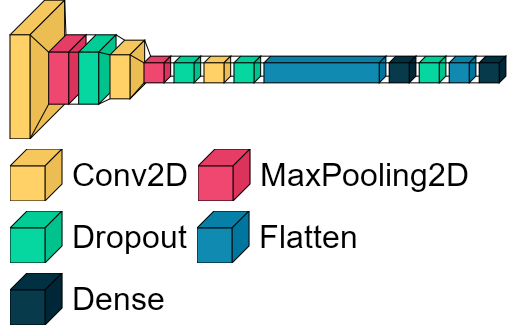

In [ ]:
import visualkeras
visualkeras.layered_view(model).show()
visualkeras.layered_view(model, to_file='output.png')
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

In [ ]:
score = model.evaluate((x_test).reshape(5000,28,28,1)/255, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2182001918554306
Test accuracy: 0.9225000143051147


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

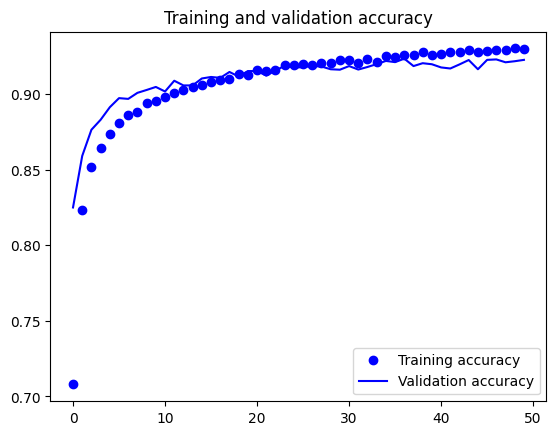

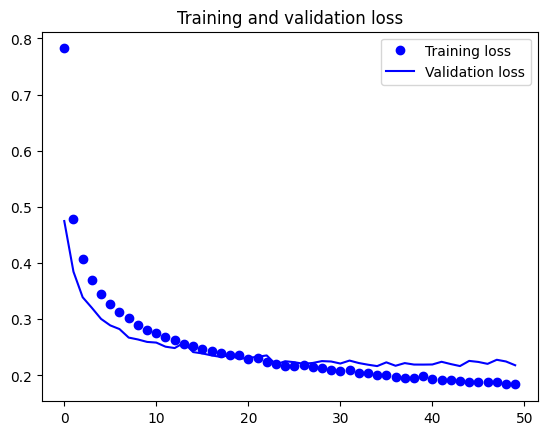

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Showing performance based on predicted values

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
#get the predictions for the test data
predicted_classes = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


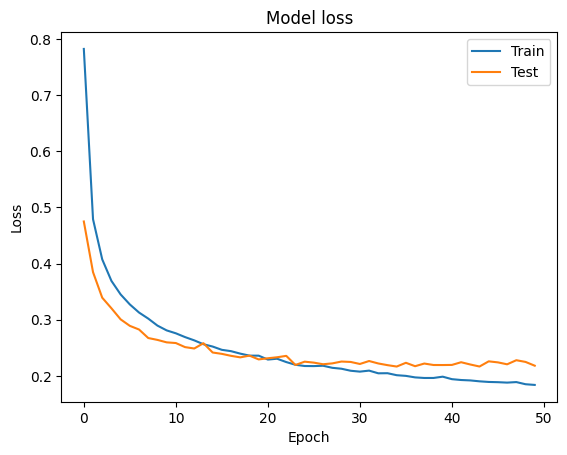

In [ ]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()
plot_loss(history.history['loss'], history.history['val_loss'])

In [ ]:
#locate index of '1' in each row
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(predicted_classes)

[9 2 1 ... 8 1 5]


In [ ]:
from sklearn.metrics import classification_report
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
         "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
#get the indices to be plotted
correct = np.nonzero(predicted_classes==y_test)[0]
incorrect = np.nonzero(predicted_classes!=y_test)[0]
target_names = ["Class {}".format(i,labels[i]) for i in range(10)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.91      0.47      0.62      1000
     Class 1       0.96      0.98      0.97      1000
     Class 2       0.86      0.13      0.22      1000
     Class 3       0.93      0.83      0.88      1000
     Class 4       0.54      0.95      0.69      1000
     Class 5       0.87      0.98      0.92      1000
     Class 6       0.44      0.70      0.54      1000
     Class 7       0.96      0.84      0.90      1000
     Class 8       0.93      0.98      0.96      1000
     Class 9       0.97      0.96      0.96      1000

    accuracy                           0.78     10000
   macro avg       0.84      0.78      0.77     10000
weighted avg       0.84      0.78      0.77     10000



## Correct predictions

C:\Users\Xavier\AppData\Local\Temp\ipykernel_29412\1733643227.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


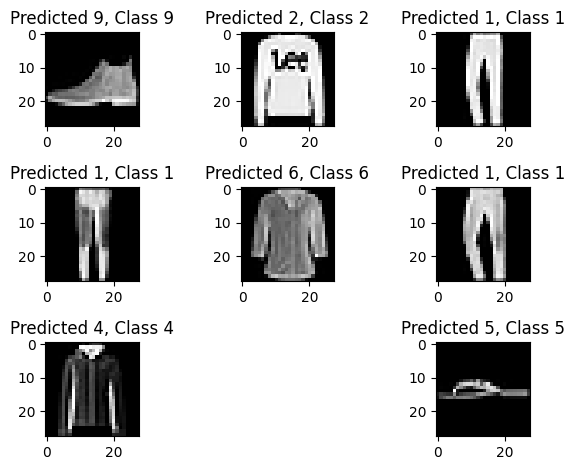

In [ ]:
for i, correct_val in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct_val].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct_val], y_test[correct_val]))
    plt.tight_layout()

# Incorrect predictions

C:\Users\Xavier\AppData\Local\Temp\ipykernel_29412\3139133992.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


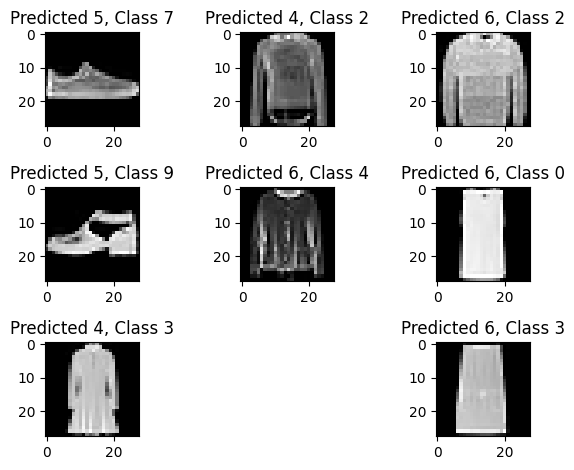

In [ ]:
for i, incorrect_val in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect_val].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect_val], y_test[incorrect_val]))
    plt.tight_layout()

# Building a better model